In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 23 - Silhouette score revisited and Principal Components Analysis

Load the iris dataset, as in previous labs.

In [2]:
iris_dict = datasets.load_iris()

iris = pd.DataFrame(iris_dict.data, columns = iris_dict.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scale the columns of the iris dataset.

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
iris_scaled = scaler.fit_transform(iris)

Below is code to compute the silhouette coefficient for each data point, with the number of clusters ranging from 2 to 6.

For n_clusters = 2 The average silhouette_score is : 0.630047128435471
For n_clusters = 3 The average silhouette_score is : 0.5047687565398589
For n_clusters = 4 The average silhouette_score is : 0.44506548804598545
For n_clusters = 5 The average silhouette_score is : 0.35257081557228115
For n_clusters = 6 The average silhouette_score is : 0.34436646319757486


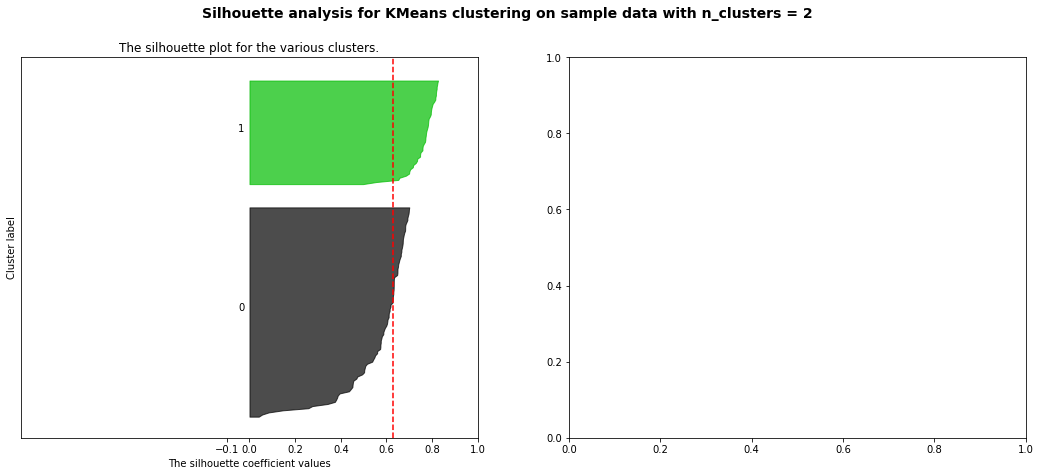

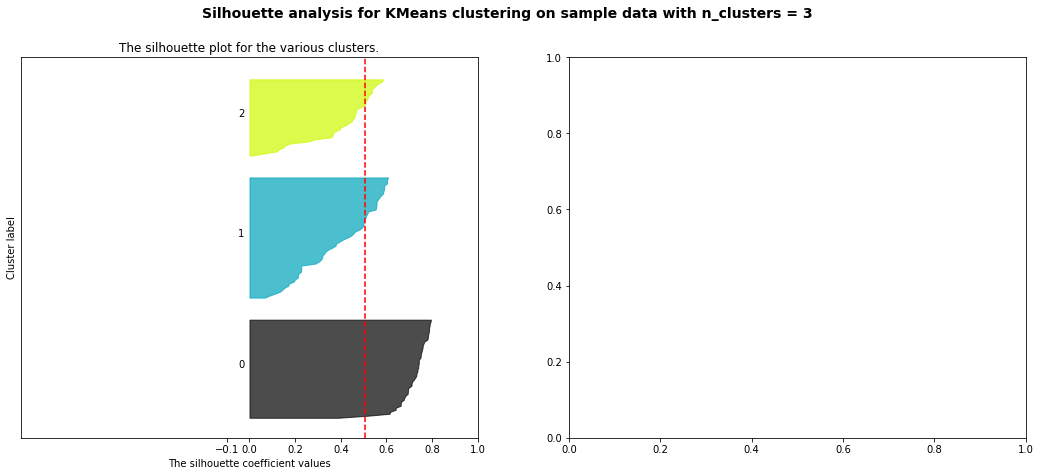

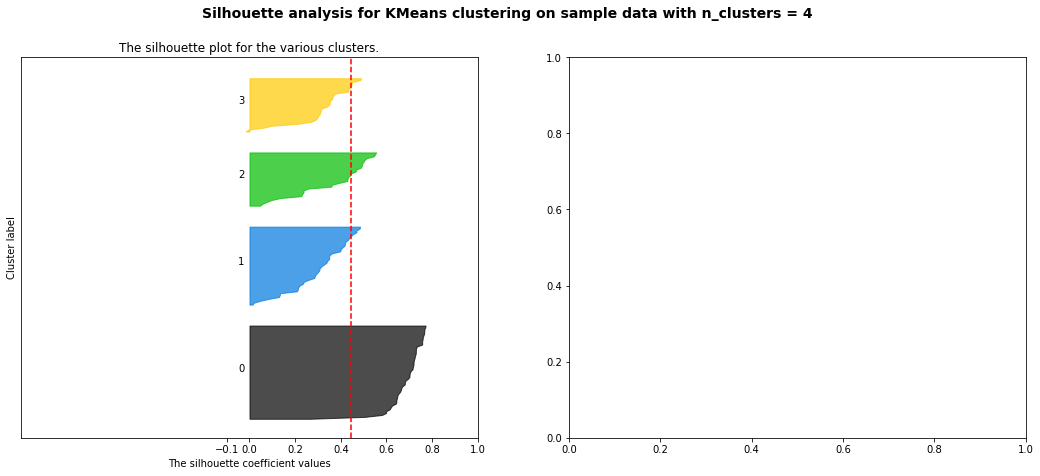

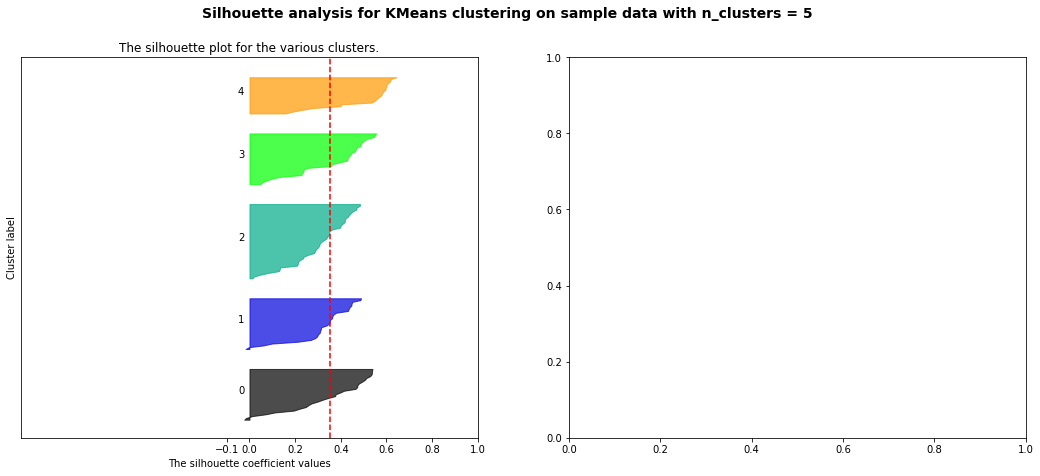

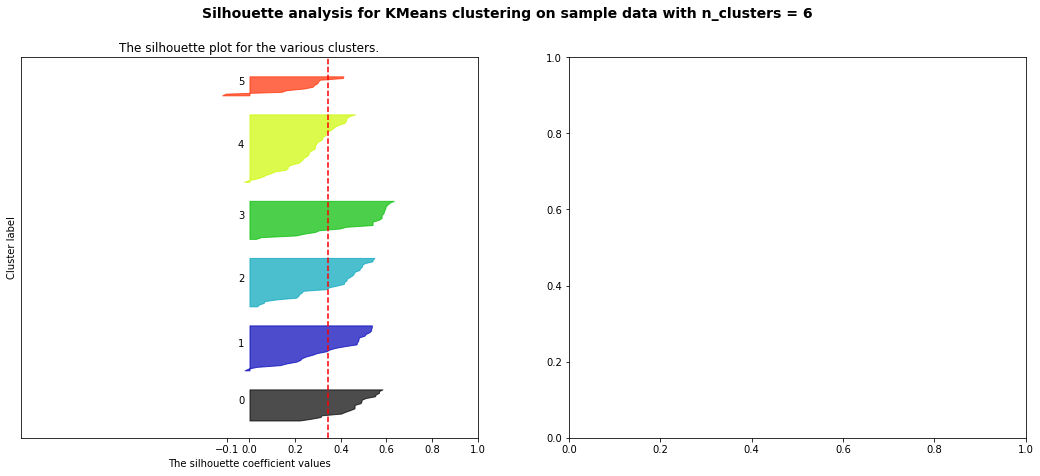

In [4]:
for k in range(2,7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(iris_scaled) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(iris_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(iris_scaled, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(iris_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')


## Principal Components Analysis

Principal Components Analysis or PCA reduces the dimensions of the data set by successively finding the directions with the most variation and using these directions as the new coordinate system.

The following code finds the first two principal components for the iris dataset:

In [5]:
pca = PCA(n_components=2)
pca.fit(iris)
iris_rotated = pca.transform(iris)

Let's create a new dataframe with the principal components and the species names.

In [6]:
iris_rotated_df = pd.DataFrame(iris_rotated, columns = ["PC1","PC2"])
iris_rotated_df["Species"] = iris_dict.target
iris_rotated_df.head()

,PC1,PC2,Species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


Display this dataframe.

Use Seaborn to plot a scatter plot where x is PC1 and y is PC2, with the points colored by the species.

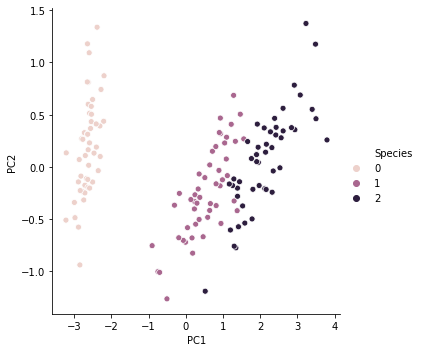

In [12]:
sns.relplot(x = "PC1", y = "PC2", data = iris_rotated_df, hue = "Species")

Let's compare this scatter plot with all possible scatter plots from the original data. 

First create a new dataframe with the original iris data and the species names.

In [16]:
iris_dict = datasets.load_iris()

iris = pd.DataFrame(iris_dict.data, columns = iris_dict.feature_names)
iris["Species"] = iris_dict.target
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now use pairplot() to plot the scatter plots.  hue will also work as a parameter here.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


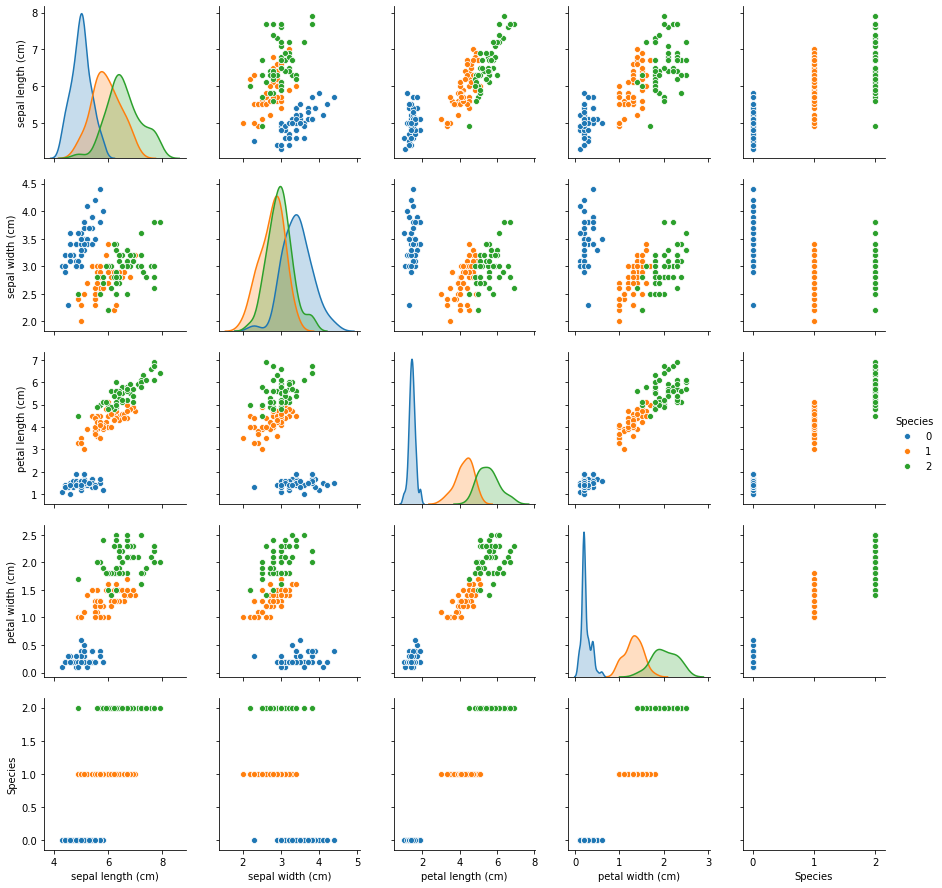

In [19]:
sns.pairplot(iris, hue = "Species")

Load the labor dataset.

In [21]:
labor = pd.read_csv("labor_market.csv", index_col = "Major")
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

In [22]:
labor.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,3.1,53.9,40000.0,60000.0,20.8
Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8
Environmental Studies,4.6,49.3,36000.0,65000.0,32.2
Architecture,4.3,26.6,45000.0,75000.0,37.4
Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4


Transform the labor data.

In [23]:
labor_scaled = scaler.fit_transform(labor)

Put the data into a dataframe.

In [24]:
labor_scaled = pd.DataFrame(labor_scaled,columns = labor.columns, index = labor.index)

Find the first two principal components using the unscaled labor data.

In [26]:
pca2 = PCA(n_components = 2)
pca2.fit(labor)
labor_rotated = pca2.transform(labor)

Use k-means to cluster the scaled labor data.

In [35]:
kmeans = KMeans(n_clusters = 4)
kmeans_clusters = kmeans.fit_predict(labor_scaled)

Create a new dataframe with the principal components and the cluster labels.

In [36]:
labor_rotated_df = pd.DataFrame(labor_rotated, columns = ["PC1", "PC2"])
labor_rotated_df["cluster"] = kmeans_clusters
labor_rotated_df

,PC1,PC2,cluster
0,-9363.938082,-2049.841669,0
1,-11838.300442,2294.992513,0
2,-6998.597070,3900.376456,0
3,6144.917499,1028.387787,1
4,-12960.578302,-1796.520750,2
5,-674.280959,2898.879754,0
6,-6008.850321,2162.434681,0
7,-11838.299677,2294.982308,0
8,1063.652179,3888.614437,0
9,8619.274832,-3316.425451,1


Plot the colored-by-cluster data using the principal component coordinates.

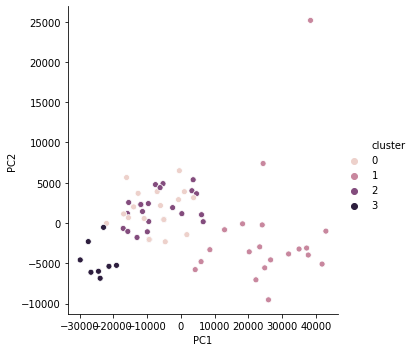

In [39]:
sns.relplot(x = "PC1", y = "PC2", hue = "cluster", data = labor_rotated_df)

We can even find the first three principal components and plot them in 3D.

In [40]:
pca2 = PCA(n_components=3)
pca2.fit(labor)
labor2_rotated = pca2.transform(labor)

In [41]:
labor2_rotated_df = pd.DataFrame(labor2_rotated,columns = ["PC1","PC2","PC3"])
labor2_rotated_df["Cluster"] = kmeans_clusters

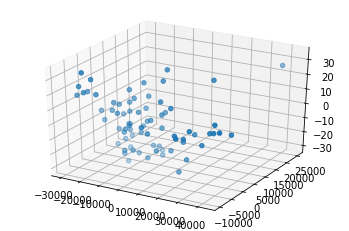

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(labor2_rotated_df["PC1"], labor2_rotated_df["PC2"], labor2_rotated_df["PC3"]);